In [5]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

!pip install torch
!pip install torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------------- ------- 1.3/1.6 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 8.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   --------------------------------- ------ 2.1/2.5 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 10.0 MB/s  0:00:00

   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ------------------------------

In [1]:
import matplotlib.pyplot as plt


In [ ]:
# dir = 'C:/Users/justi/Downloads/auto_price.csv'
# auto_price = pd.read_csv(dir)

In [6]:
# target_hp = auto_price[['target', 'horsepower']]
# target_hp

In [4]:
import torch

x = torch.randn(1, 3, 1, 4)
print(f"Original shape: {x.shape}") 

y = torch.squeeze(x)
print(f"Shape after squeezing all dimensions of size 1: {y.shape}")

z = torch.squeeze(x, dim=0) # Squeeze the first dimension (index 0)
print(f"Shape after squeezing dim 0: {z.shape}") 

print(f"This is what x looks like: \n {x}")
print(f"This is what y looks like: \n {y}")
print(f"This is what z looks like: \n {z}")

Original shape: torch.Size([1, 3, 1, 4])
Shape after squeezing all dimensions of size 1: torch.Size([3, 4])
Shape after squeezing dim 0: torch.Size([3, 1, 4])
This is what x looks like: 
 tensor([[[[-1.1835,  0.8514, -1.9015,  0.1564]],

         [[-0.3750,  0.6016,  0.8139, -0.9016]],

         [[-0.4084, -0.2162, -0.0173,  1.8595]]]])
This is what y looks like: 
 tensor([[-1.1835,  0.8514, -1.9015,  0.1564],
        [-0.3750,  0.6016,  0.8139, -0.9016],
        [-0.4084, -0.2162, -0.0173,  1.8595]])
This is what z looks like: 
 tensor([[[-1.1835,  0.8514, -1.9015,  0.1564]],

        [[-0.3750,  0.6016,  0.8139, -0.9016]],

        [[-0.4084, -0.2162, -0.0173,  1.8595]]])


### PyTorch Optimization loop song!
It's train time!

do the forward pass,

calculate the loss

optimizer zero grad

losssssss backwards!

Optimizer step step step

Let's test now!

with torch no grad:

do the forward pass,

calculate the loss,

watch it go down down down!

**This song is not helpful**

In [ ]:
loss_fn = torch.nn.L1Loss()
epochs = 1
for epoch in range(epochs):
    # forward pass
    y_pred = model(X_train)

    # calculate loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backwards
    loss.backward()

    # optimizer step
    optimizer.step()

In [ ]:
do the forward step
calculate the loss
optimizer zero grad
losssssss backward
optimizer step step step

### Make circles and make nn to predict

<Axes: >

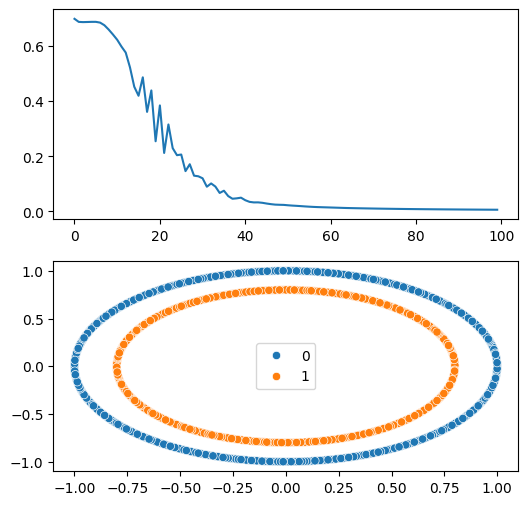

In [57]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

### -------------------------------------------------------------------------------
class model(nn.Module):
    def __init__(self, n_inputs, n_outputs, hidden_units):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=n_inputs, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=n_outputs)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
### -------------------------------------------------------------------------------

X, y = make_circles(n_samples=1000,
                    random_state=77)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
X_train, X_test = torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(X_test).type(torch.float32)
y_train, y_test = torch.from_numpy(y_train).type(torch.float32), torch.from_numpy(y_test).type(torch.float32)
# X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype
# (torch.float64, torch.float64, torch.int64, torch.int64)

# Make optimizer and loss function and model
my_model = model(n_inputs=2, n_outputs=1, hidden_units=8)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=my_model.parameters(), lr=0.1)

epochs = 100
loss_list = []
for epoch in range(epochs):
    my_model.train()

    y_logits = my_model(X_train).squeeze()
    # y_pred_prob = torch.sigmoid(y_logits)
    # y_preds = torch.round(y_pred_prob)

    loss = loss_fn(y_logits, y_train)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing
    my_model.eval()
    with torch.inference_mode():
        test_logits = my_model(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test)
        loss_list.append(test_loss)

    # if epoch % 100 == 0 :
    #     print(f"Epoch {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")



loss_list = [t.numpy() for t in loss_list]
loss_list = np.stack(loss_list)

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
sns.lineplot(x=np.arange(start=0, stop=len(loss_list)), y=loss_list)
plt.subplot(2, 1, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)